# Introduction

## The ultimate Soccer database for data analysis and machine learning
### What you get:

- +25,000 matches
- +10,000 players
- 11 European Countries with their lead championship
- Seasons 2008 to 2016
- Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates
- Team line up with squad formation (X, Y coordinates)
- Betting odds from up to 10 providers
- Detailed match events (goal types, possession, corner, cross, fouls, cards etc…) for +10,000 matches

# Questions 
- What is the nuber of matchs in each league?
- What is the nuber of matchs in each season?
- Which player had the most penalties?
- What is the most age of players?
- What the range of height and weight distribution?
- Which foot is preferred bu players?
- What the the budget of each team?
- What is the salary of players?

# 1-Importing  libraries

In [21]:
import pandas as pd
import numpy as np
import sqlite3
from datetime import datetime, date
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
# Asses function get information ,describtion and ccount nan values
def assess_table(table_name):
    print('First three rows of table',table_name.head(3))  
    print('\nThe information of table\n',table_name.info())
    print('\nThe describtion of table\n',table_name.describe())
    print('\nThe null count\n',table_name.isnull().sum())
    

# 2-Gathering

In [23]:
# Connect to database
con = sqlite3.connect("C:/Users/mohammed/Desktop/Python/leaga/database.sqlite")


# 3-Assessing & Cleaning

- Read sqlite query results into a pandas DataFrame
- Get information about data
- Make Summary Statistics
- Fix findded issues


------------------------------

# Countries_table

In [79]:
countries = pd.read_sql_query("SELECT * from Country", con)

assess_table(countries)

First three rows of table      id     name
0     1  Belgium
1  1729  England
2  4769   France
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes

The information of table
 None

The describtion of table
                  id
count     11.000000
mean   12452.090909
std     8215.308472
min        1.000000
25%     6289.000000
50%    13274.000000
75%    18668.000000
max    24558.000000

The null count
 id      0
name    0
dtype: int64


------------------------------

# Leagues_table

In [80]:
leagues = pd.read_sql_query("SELECT * from League", con)

assess_table(leagues)

First three rows of table      id  country_id                    name
0     1           1  Belgium Jupiler League
1  1729        1729  England Premier League
2  4769        4769          France Ligue 1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes

The information of table
 None

The describtion of table
                  id    country_id
count     11.000000     11.000000
mean   12452.090909  12452.090909
std     8215.308472   8215.308472
min        1.000000      1.000000
25%     6289.000000   6289.000000
50%    13274.000000  13274.000000
75%    18668.000000  18668.000000
max    24558.000000  24558.000000

The null count
 id            0
country_id    0
name          0
dtype: int6

------------------------------

# Matchs_table

In [81]:
matchs = pd.read_sql_query("SELECT * from Match", con)
assess_table(matchs)

First three rows of table    id  country_id  league_id     season  stage                 date  \
0   1           1          1  2008/2009      1  2008-08-17 00:00:00   
1   2           1          1  2008/2009      1  2008-08-16 00:00:00   
2   3           1          1  2008/2009      1  2008-08-16 00:00:00   

   match_api_id  home_team_api_id  away_team_api_id  home_team_goal  ...  SJA  \
0        492473              9987              9993               1  ...  4.0   
1        492474             10000              9994               0  ...  3.8   
2        492475              9984              8635               0  ...  2.5   

    VCH   VCD   VCA   GBH   GBD   GBA   BSH   BSD   BSA  
0  1.65  3.40  4.50  1.78  3.25  4.00  1.73  3.40  4.20  
1  2.00  3.25  3.25  1.85  3.25  3.75  1.91  3.25  3.60  
2  2.35  3.25  2.65  2.50  3.20  2.50  2.30  3.20  2.75  

[3 rows x 115 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA


In [82]:
matchs.date.dtypes

dtype('O')

In [83]:
matchs.season.value_counts()

2008/2009    3326
2015/2016    3326
2014/2015    3325
2012/2013    3260
2010/2011    3260
2009/2010    3230
2011/2012    3220
2013/2014    3032
Name: season, dtype: int64

In [84]:
matchs.home_team_goal.value_counts()

1     8400
2     6339
0     5896
3     3288
4     1385
5      457
6      161
7       38
8        9
9        4
10       2
Name: home_team_goal, dtype: int64

In [85]:
matchs.away_team_goal.value_counts()

1    8989
0    8687
2    5146
3    2145
4     718
5     215
6      63
7      10
8       5
9       1
Name: away_team_goal, dtype: int64

## Clean
- drop not needed columns
- convert Date column to datetype

In [86]:
#make a copy of table
matchs_clean = matchs.copy()

In [88]:
print(matchs_clean.isnull().sum())

id                  0
country_id          0
league_id           0
season              0
stage               0
date                0
match_api_id        0
home_team_api_id    0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
dtype: int64


In [87]:
#drop not needed columns
matchs_clean.drop(matchs_clean.iloc[:, 11:], axis = 1, inplace = True)
matchs_clean.head

<bound method NDFrame.head of           id  country_id  league_id     season  stage                 date  \
0          1           1          1  2008/2009      1  2008-08-17 00:00:00   
1          2           1          1  2008/2009      1  2008-08-16 00:00:00   
2          3           1          1  2008/2009      1  2008-08-16 00:00:00   
3          4           1          1  2008/2009      1  2008-08-17 00:00:00   
4          5           1          1  2008/2009      1  2008-08-16 00:00:00   
...      ...         ...        ...        ...    ...                  ...   
25974  25975       24558      24558  2015/2016      9  2015-09-22 00:00:00   
25975  25976       24558      24558  2015/2016      9  2015-09-23 00:00:00   
25976  25977       24558      24558  2015/2016      9  2015-09-23 00:00:00   
25977  25978       24558      24558  2015/2016      9  2015-09-22 00:00:00   
25978  25979       24558      24558  2015/2016      9  2015-09-23 00:00:00   

       match_api_id  home_team_ap

In [89]:
#convert Date column to datetype
matchs_clean['date'] = pd.to_datetime(matchs_clean['date'])
matchs_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                25979 non-null  int64         
 1   country_id        25979 non-null  int64         
 2   league_id         25979 non-null  int64         
 3   season            25979 non-null  object        
 4   stage             25979 non-null  int64         
 5   date              25979 non-null  datetime64[ns]
 6   match_api_id      25979 non-null  int64         
 7   home_team_api_id  25979 non-null  int64         
 8   away_team_api_id  25979 non-null  int64         
 9   home_team_goal    25979 non-null  int64         
 10  away_team_goal    25979 non-null  int64         
dtypes: datetime64[ns](1), int64(9), object(1)
memory usage: 2.2+ MB


------------------------------

# Teams_table

In [90]:
teams = pd.read_sql_query("SELECT * from Team", con)
assess_table(teams)

First three rows of table    id  team_api_id  team_fifa_api_id    team_long_name team_short_name
0   1         9987             673.0          KRC Genk             GEN
1   2         9993             675.0      Beerschot AC             BAC
2   3        10000           15005.0  SV Zulte-Waregem             ZUL
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB

The information of table
 None

The describtion of table
                  id    team_api_id  team_fifa_api_id
count    299.000000     299.000000        288.000000
mean   23735.301003   12340.5

## Clean
- The colunmm (team_fifa_api_id) of teams has missing values.


------------------------------

# Team_Attributes_table

In [91]:
team_attributes = pd.read_sql_query("SELECT * from Team_Attributes",con)
assess_table(team_attributes)

First three rows of table    id  team_fifa_api_id  team_api_id                 date  buildUpPlaySpeed  \
0   1               434         9930  2010-02-22 00:00:00                60   
1   2               434         9930  2014-09-19 00:00:00                52   
2   3               434         9930  2015-09-10 00:00:00                47   

  buildUpPlaySpeedClass  buildUpPlayDribbling buildUpPlayDribblingClass  \
0              Balanced                   NaN                    Little   
1              Balanced                  48.0                    Normal   
2              Balanced                  41.0                    Normal   

   buildUpPlayPassing buildUpPlayPassingClass  ... chanceCreationShooting  \
0                  50                   Mixed  ...                     55   
1                  56                   Mixed  ...                     64   
2                  54                   Mixed  ...                     64   

   chanceCreationShootingClass chanceCreationPo

In [92]:
team_attributes.buildUpPlaySpeed.max()

80

In [93]:
team_attributes.buildUpPlaySpeed.value_counts()

50    96
30    70
55    67
45    66
65    64
70    63
52    62
60    59
48    53
53    47
47    42
49    40
54    39
35    39
67    39
58    38
66    38
46    38
64    37
63    36
40    33
59    29
38    27
61    26
57    26
51    24
56    24
62    24
68    22
42    18
41    18
44    15
69    13
36    13
34    12
43    12
39    12
37    10
33     9
75     8
73     7
72     6
71     6
31     4
25     4
24     3
32     3
20     3
76     3
78     2
29     2
26     2
74     1
28     1
77     1
23     1
80     1
Name: buildUpPlaySpeed, dtype: int64

In [94]:
team_attributes.chanceCreationPositioningClass.value_counts()

Organised    1309
Free Form     149
Name: chanceCreationPositioningClass, dtype: int64

## Clean
- The colunmm (buildUpPlayDribbling) of team_attributes has missing values.
- convert Date column to datetype

In [95]:
# Make a copy of team_attributes
team_attributes_clean = team_attributes

In [96]:
# Replace non-values with the mean of column
team_attributes_clean['buildUpPlayDribbling'].fillna((team_attributes_clean['buildUpPlayDribbling'].mean()), inplace=True)

In [97]:
#convert Date column to datetype
team_attributes_clean['date'] = pd.to_datetime(team_attributes_clean['date'])

In [98]:
team_attributes_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              1458 non-null   int64         
 1   team_fifa_api_id                1458 non-null   int64         
 2   team_api_id                     1458 non-null   int64         
 3   date                            1458 non-null   datetime64[ns]
 4   buildUpPlaySpeed                1458 non-null   int64         
 5   buildUpPlaySpeedClass           1458 non-null   object        
 6   buildUpPlayDribbling            1458 non-null   float64       
 7   buildUpPlayDribblingClass       1458 non-null   object        
 8   buildUpPlayPassing              1458 non-null   int64         
 9   buildUpPlayPassingClass         1458 non-null   object        
 10  buildUpPlayPositioningClass     1458 non-null   object        
 11  chan

------------------------------

# Player_Table

In [99]:
player = pd.read_sql_query("SELECT * from Player",con)
assess_table(player)

First three rows of table    id  player_api_id         player_name  player_fifa_api_id  \
0   1         505942  Aaron Appindangoye              218353   
1   2         155782     Aaron Cresswell              189615   
2   3         162549         Aaron Doran              186170   

              birthday  height  weight  
0  1992-02-29 00:00:00  182.88     187  
1  1989-12-15 00:00:00  170.18     146  
2  1991-05-13 00:00:00  170.18     163  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtyp

In [100]:
print(player[['height','weight']].describe())

             height        weight
count  11060.000000  11060.000000
mean     181.867445    168.380289
std        6.369201     14.990217
min      157.480000    117.000000
25%      177.800000    159.000000
50%      182.880000    168.000000
75%      185.420000    179.000000
max      208.280000    243.000000


In [101]:
print("The oldest player:",player['birthday'].min(),'  ',"The younger player:",player['birthday'].max())

The oldest player: 1967-01-23 00:00:00    The younger player: 1999-04-24 00:00:00


## Clean
- Birthday need to convet to date type.

In [102]:
clean_player = player.copy()
clean_player['birthday'] = pd.to_datetime(clean_player['birthday'])
clean_player['age'] = (2016 - clean_player['birthday'].dt.year)
clean_player['age'].value_counts()

28    802
27    723
29    722
30    710
25    699
26    696
24    643
32    607
31    593
33    541
23    529
34    487
35    475
22    462
36    434
37    345
21    331
38    263
20    234
39    191
40    156
41    113
19    103
42     77
43     43
18     24
44     22
45     12
46     12
47      6
17      3
49      1
48      1
Name: age, dtype: int64

------------------------------

# player_attributes_table

In [103]:
player_attributes = pd.read_sql_query("SELECT * from Player_Attributes",con)
assess_table(player_attributes)

First three rows of table    id  player_fifa_api_id  player_api_id                 date  overall_rating  \
0   1              218353         505942  2016-02-18 00:00:00            67.0   
1   2              218353         505942  2015-11-19 00:00:00            67.0   
2   3              218353         505942  2015-09-21 00:00:00            62.0   

   potential preferred_foot attacking_work_rate defensive_work_rate  crossing  \
0       71.0          right              medium              medium      49.0   
1       71.0          right              medium              medium      49.0   
2       66.0          right              medium              medium      49.0   

   ...  vision  penalties  marking  standing_tackle  sliding_tackle  \
0  ...    54.0       48.0     65.0             69.0            69.0   
1  ...    54.0       48.0     65.0             69.0            69.0   
2  ...    54.0       48.0     65.0             66.0            69.0   

   gk_diving  gk_handling  gk_kicking  

In [104]:
player_attributes.preferred_foot .value_counts()      

right    138409
left      44733
Name: preferred_foot, dtype: int64

In [105]:
percentage_of_right = (138409*100)/(138409+44733)
print('The percentage of players who prefered right foot =',percentage_of_right,"%")
print('The percentage of players who prefered left foot =',100-percentage_of_right,"%")

The percentage of players who prefered right foot = 75.57469067717946 %
The percentage of players who prefered left foot = 24.42530932282054 %


## Clean
- Convert date type
- Player_attributes need cleaning alot of columns have non-values 

In [106]:
Player_attributes_clean = player_attributes.copy()

In [107]:
#Convert date type
Player_attributes_clean['date'] = pd.to_datetime(Player_attributes_clean['date'])

In [108]:
# Replace non-values with the mean of column
Player_attributes_clean['overall_rating'].fillna((Player_attributes_clean['overall_rating'].mean()), inplace=True)


In [109]:
#get float columns of player_attributes in df
df = Player_attributes_clean.iloc[:,9:]

df.insert(0,'overall_rating ', Player_attributes_clean['overall_rating'],allow_duplicates=False)
df.insert(1,'potential ', Player_attributes_clean['potential'],allow_duplicates=False)

In [110]:
# Replace non-values with the mean of columns
for column in df:
    df[column].fillna(df[column].mean(), inplace = True)
    
df.isnull().sum()

overall_rating        0
potential             0
crossing              0
finishing             0
heading_accuracy      0
short_passing         0
volleys               0
dribbling             0
curve                 0
free_kick_accuracy    0
long_passing          0
ball_control          0
acceleration          0
sprint_speed          0
agility               0
reactions             0
balance               0
shot_power            0
jumping               0
stamina               0
strength              0
long_shots            0
aggression            0
interceptions         0
positioning           0
vision                0
penalties             0
marking               0
standing_tackle       0
sliding_tackle        0
gk_diving             0
gk_handling           0
gk_kicking            0
gk_positioning        0
gk_reflexes           0
dtype: int64

------------------------------

# Exploratory Data Analysis

In [56]:
# join match and league in (league_name , home_team_goal   ,away_team_goal , season )
Team_League = pd.read_sql("""SELECT League.name as league_name   ,home_team_goal  ,away_team_goal ,season 
                                    FROM   League INNER JOIN Match 
                                    ON League.id = Match.league_id ;""",con)
Team_League.head()   

,league_name,home_team_goal,away_team_goal,season
0,Belgium Jupiler League,1,1,2008/2009
1,Belgium Jupiler League,0,0,2008/2009
2,Belgium Jupiler League,0,3,2008/2009
3,Belgium Jupiler League,5,0,2008/2009
4,Belgium Jupiler League,1,3,2008/2009


# What is the nuber of matchs in each league?

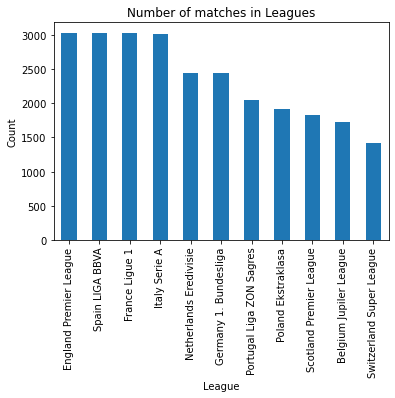

In [67]:
Team_League['league_name'].value_counts().plot.bar()
plt.xlabel("League")
plt.ylabel("Count")
plt.title("Number of matches in Leagues")
plt.show()

# What is the nuber of matchs in each season?

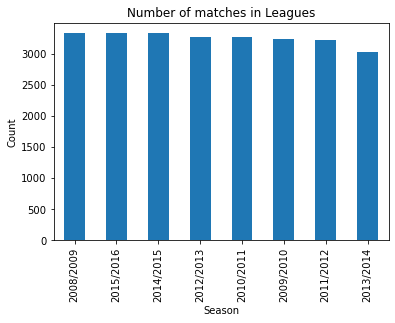

In [68]:
matchs['season'].value_counts().plot.bar()
plt.xlabel("Season")
plt.ylabel("Count")
plt.title("Number of matches in Leagues")
plt.show()

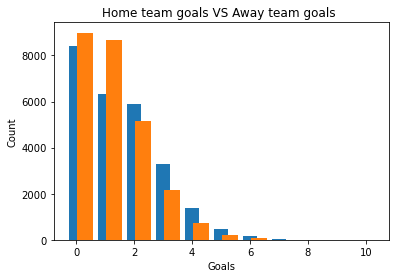

In [71]:
m1 = Team_League.home_team_goal.value_counts()
m2 = Team_League.away_team_goal.value_counts()

plt.bar(np.arange(len(m1)), m1, width=.5)
plt.bar(np.arange(len(m2))+.3, m2, width=.55)
plt.xlabel("Goals")
plt.ylabel("Count")
plt.title("Home team goals VS Away team goals ")

plt.show()

# Which player had the most penalties?

In [60]:
# join Player and Player_attributes in (player_name , penalties )
player_penalties = pd.read_sql("""SELECT Player.player_name ,Player_attributes.penalties  
                                  FROM player INNER JOIN Player_attributes ON 
                                    player.player_api_id = Player_attributes.player_api_id ;""",con)
player_penalties.head()  

,player_name,penalties
0,Aaron Appindangoye,48.0
1,Aaron Appindangoye,48.0
2,Aaron Appindangoye,48.0
3,Aaron Appindangoye,47.0
4,Aaron Appindangoye,47.0


In [61]:
player_penalties.nlargest(10, ['penalties'])

,player_name,penalties
149591,Rickie Lambert,96.0
149592,Rickie Lambert,96.0
149593,Rickie Lambert,96.0
149594,Rickie Lambert,96.0
12015,Andrea Pirlo,95.0
12016,Andrea Pirlo,95.0
113521,Mario Balotelli,95.0
113522,Mario Balotelli,95.0
113523,Mario Balotelli,95.0
113524,Mario Balotelli,95.0


# What is the most age of players?

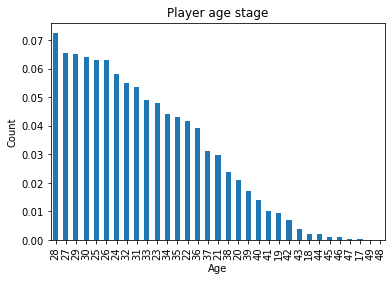

In [72]:
clean_player['age'].value_counts(5).plot.bar(20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Player age stage')
plt.show()

#### Conclusion
- It seem that the most age is 28. 

# What the range of height and weight distribution?

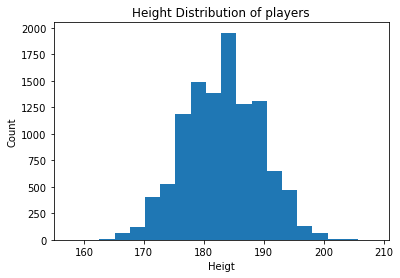

In [73]:
plt.hist('height', data=player, bins = 20)
plt.xlabel('Heigt')
plt.ylabel('Count')
plt.title('Height Distribution of players')
plt.show()

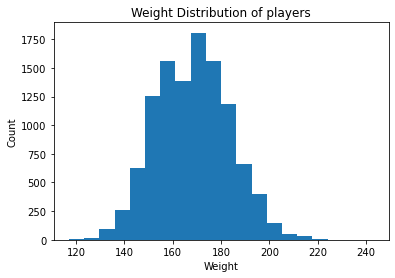

In [74]:
plt.hist('weight', data=player, bins = 20)
plt.xlabel('Weight')
plt.ylabel('Count')
plt.title('Weight Distribution of players')
plt.show()

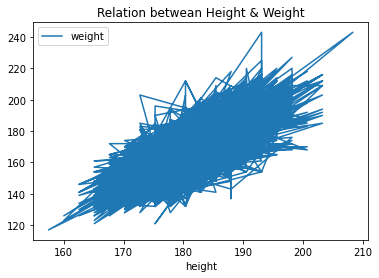

In [118]:
player.plot('height' , 'weight')
plt.title('Relation betwean Height & Weight')
plt.show()

# 

------------------------------------

# Which foot is preferred by players? 

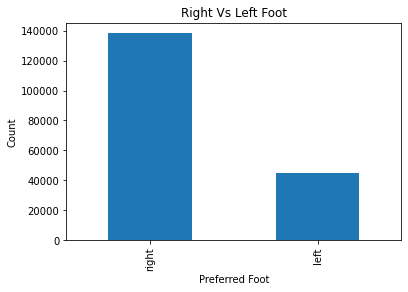

In [75]:
player_attributes.preferred_foot.value_counts().plot.bar() 
plt.xlabel("Preferred Foot")
plt.ylabel("Count")
plt.title("Right Vs Left Foot")
plt.show()

----------------------------------------------------------------

## Limitation
- There are so many tables and some tables have so many fileds. Even after figuring out how to join and relate different tables, it was overwhelming and difficult to figure out what kind of questions can be asked using this data set.
- A Lot of columns have missing values that make some analysis no perfect.
- There is no the badget of teams that will help to predict that the team make a good deal with proffisonal players.

# Conclusions
- The (Spanin , France , English , Italy) had the top number of matches.
- The all seasos had almost the same number of matches
- The player who had the most penaties is Rickie Lambert
- The chance of away_team to win with (1 , 2) goals is more than home_team.    
- The most age is 28. 
- The range player heitdth is betwean (175,190) cm.
- The range player weitdth is betwean (150,185) ibs.
- The relation betwean height and weight is linear.
- The 75% of players preffered the Right foot.